In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split

import wrangle as w
import explore as e
import acquire as a
import warnings
warnings.filterwarnings("ignore")
import env
import prepare_regression as pr

# modeling methods
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures



%matplotlib inline

train, validate, test = w.wrangle_zillow()

county_encoded = pd.get_dummies(train.county, drop_first=False)

train_encoded = train.merge(county_encoded, left_index=True, right_index=True)
train_encoded = train_encoded.drop(columns='county')

train_encoded.head()




Features to include:

- counties (Los_Angeles, Orange, Ventura)
-  total_sqft
- tax_value (when do I drop this?)
- bathrooms


#minmaxscaler

def scale_zillow(train, validate, test):

    train_1 = train.copy()
    validate_1 = validate.copy()
    test_1 = validate.copy()

    scale_cols = ['bedrooms', 'bathrooms', 'total_sqft', 'year_built', 'tax_value']
    minmax_scaler = p.MinMaxScaler()
    minmax_scaler.fit(train_1[scale_cols])
    train_1[scale_cols] = minmax_scaler.transform(train[scale_cols])
    validate_1 = minmax_scaler.transform(validate[scale_cols])
    test_1 = minmax_scaler.transform(test[scale_cols])

    return pd.DataFrame(train_1).set_index([train.index.values]), pd.DataFrame(validate_1).set_index([validate.index.values]), pd.DataFrame(test_1).set_index([test.index.values])


train_1, validate_1, test_1 = scale_zillow(train, validate, test)

In [ ]:
train = e.county_dummies(train)

In [ ]:
train.head()

In [ ]:
train = train.drop(columns= ['parcel_id', 'property_id', 'zip_code'])

In [ ]:
train.head()

In [ ]:
validate = e.county_dummies(validate)

In [ ]:
validate = validate.drop(columns= ['parcel_id', 'property_id', 'zip_code'])

In [ ]:
validate

In [ ]:
test = e.county_dummies(test)
test = test.drop(columns= ['parcel_id', 'property_id', 'zip_code'])
test.head()

- - -

- - -

- - -

In [3]:
#getting county dummies and dropping columns
train, validate, test = e.model_prep(train, validate, test)

#separating target variable
train_X_train, train_y_train = e.X_train_y_train_split(train)
validate_X_train, validate_y_train = e.X_train_y_train_split(validate)
test_X_train, test_y_train = e.X_train_y_train_split(test)

#scaling
train_X_train, validate_X_train, test_X_train = pr.scale_dataframes(train_X_train, validate_X_train, test_X_train)

train_X_train.head(), validate_X_train.head(), test_X_train.head()

#scaling
train_X_train, validate_X_train, test_X_train = pr.scale_dataframes(train_X_train, validate_X_train, test_X_train)


train_y_train.head(), validate_y_train.head(), test_y_train.head()

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

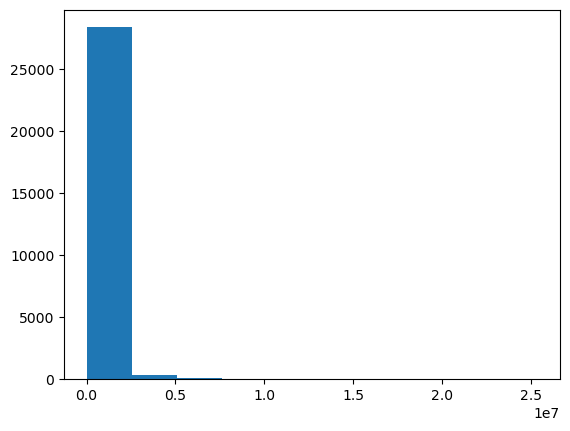

In [5]:
#plot variable y
plt.hist(train_y_train)
plt.xlabel

- - -
                                      Get Baseline
- - -

In [12]:
y_mean = train_y_train.mean()
y_mean

tax_value    527866.299164
dtype: float64

In [16]:
#store the mean
train_y_train['y_pred_mean'] = 527866.30


In [17]:
train_y_train

,tax_value,y_pred_mean
31793,428575.0,527866.3
52132,647000.0,527866.3
36759,245335.0,527866.3
27845,389856.0,527866.3
10940,571678.0,527866.3
...,...,...
36610,692000.0,527866.3
37446,408327.0,527866.3
28826,528945.0,527866.3
7133,440273.0,527866.3


In [13]:
y_median = train_y_train.median()
y_median

tax_value    376866.0
dtype: float64

In [ ]:
#store median
train_y_train = 376866.00
validate_y_